In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split,KFold,cross_val_score 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error,confusion_matrix,accuracy_score 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import seaborn as sns
from pprint import pprint
%matplotlib inline 

In [ ]:
#import the dataset from your drive if you want to
#from google.colab import drive
#drive.mount('/content/drive')

#copied the path of the dataset 
#path = "/content/drive/My Drive/Colab Notebooks/train.csv"
#data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
data = pd.read_csv("train.csv")
print(data.shape)
print(data.head())
test = pd.read_csv("test.csv")

(456548, 9)
        id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40  


In [46]:
meal = pd.read_csv("meal_info.csv")
print(meal.describe())
list = np.array(meal['category'].unique())
print("Available cuisine:",meal['cuisine'].unique(),"under the category of",list,)
meal.head()


           meal_id
count    51.000000
mean   2013.921569
std     553.633555
min    1062.000000
25%    1550.500000
50%    1971.000000
75%    2516.500000
max    2956.000000
Available cuisine: ['Thai' 'Indian' 'Italian' 'Continental'] under the category of ['Beverages' 'Extras' 'Soup' 'Other Snacks' 'Salad' 'Rice Bowl' 'Starters'
 'Sandwich' 'Pasta' 'Desert' 'Biryani' 'Pizza' 'Fish' 'Seafood']


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [42]:
center = pd.read_csv("center_info.csv")
print(center.describe())
list = center['center_type'].unique()
print("Center type:",list,sep=None)
center.head()

        center_id   city_code  region_code    op_area
count   77.000000   77.000000    77.000000  77.000000
mean    83.142857  600.662338    56.493506   3.985714
std     46.090219   66.720274    18.126473   1.106406
min     10.000000  456.000000    23.000000   0.900000
25%     50.000000  553.000000    34.000000   3.500000
50%     77.000000  596.000000    56.000000   3.900000
75%    110.000000  651.000000    77.000000   4.400000
max    186.000000  713.000000    93.000000   7.000000
Center type: ['TYPE_A' 'TYPE_B' 'TYPE_C']


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


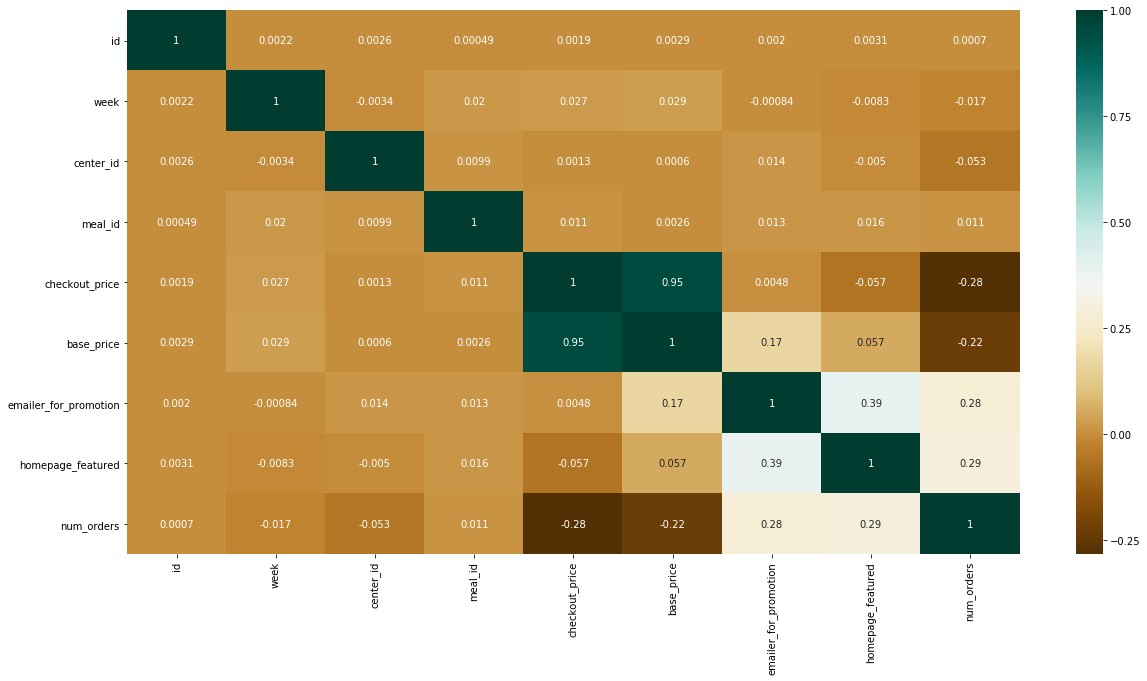

In [5]:
plt.figure(figsize=(20,10))
c = data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [3]:
features = ['id','week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion','homepage_featured']
X = data[features]
print(X.shape)
#X.head()

(456548, 8)


In [4]:
y = data.num_orders
print(y.shape)
y.head()

(456548,)


0    177
1    270
2    189
3     54
4     40
Name: num_orders, dtype: int64

In [5]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2,random_state=7)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(train_X)
X_test = scaler.transform(val_X)

C:\Users\Naresh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Naresh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Naresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [6]:
model = RandomForestRegressor()
model.fit(train_X, train_y)

C:\Users\Naresh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [7]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [11]:
evaluate(model, val_X, val_y)

Model Performance
Average Error: 81.9216 degrees.
Accuracy = 42.04%.


42.04120868097214

In [18]:
test_X = test[features]
pred = model.predict(test_X)
print(mean_squared_log_error(test.id, pred))

82.41072213161134


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_X, train_y)
grid_search.best_params_

best_grid = grid_search.best_estimator_
#grid_accuracy = evaluate(best_grid, test_features, test_labels)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 84.0min


In [ ]:
grid_accuracy = evaluate(best_grid, train_X, train_y)

In [ ]:
best_grid

In [16]:
pred = best_grid.predict(test_X)
print(mean_squared_log_error(test.id, pred))

output = pd.DataFrame({'id': test.id,
                       'num_orders': pred})
output.to_csv('Submission.csv', index=False)

82.41072213161134
